<a href="https://colab.research.google.com/github/mlfa19/assignments/blob/master/Module%201/02/Assignment_02_Companion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 02 Companion Notebook

This notebook contains some exercises to walk you through implementing the linear regression algorithm.  We'll pay special attention to debugging and visualization as we go along.

## A Toy Linear Regression Problem Revisited

As we discovered in the last assignmnet, the idea of a toy problem is very useful for validating that a machine learning algorithm is working as it is intended to.  Recall the following basic setup and role for a toy linear regression problem:

> Suppose you are given a learning algorithm designed to estimate some model parameters $\textbf{w}$ from some training data $(\mathbf{X}, \mathbf{y})$.
>
> 1.  Generate values for the model parameters $\mathbf{w}$ (e.g., set them to some known values or generate them randomly).  If you were applying your algorithm to real data, you would of course not know these parameters, but instead estimate them from data.  For our toy problem, we'll proceed with values that we generate so we can test our algorithms.
>
> 2.  Generate some training input data, $\mathbf{X}$, (random numbers work well for this).  Generate the training output data, $\mathbf{y}$, by applying the model with parameters $\mathbf{w}$.  For example, for a linear regression problem if $\mathbf{w}$ represents the regression coefficients, then we can generate each training label, $y_i$ as $y_i = \mathbf{x_i}^\top \mathbf{w}$.
>
> 3.  Run your learning algorithms on the synthesized training data $(\mathbf{X}, \mathbf{y})$ to arrive at estimated values of the model parameters, $\hat{\mathbf{w}}$.
>
> 4.  Compare $\mathbf{w}$ and $\hat{\mathbf{w}}$ as a way of understanding whether your learning algorithm is working.

In the next code block, you'll see an example of a toy regression problem where we set $\mathbf{w} = \begin{bmatrix} 1 \\ 2 \end{bmatrix}$ and generate some training data.  We'll visualize the training data to get a sense for what it looks like.

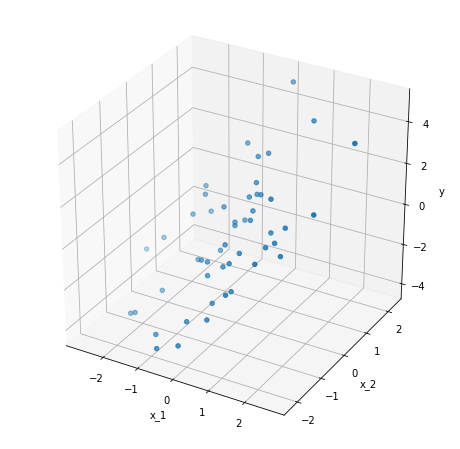

In [5]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D 
import numpy as np
import matplotlib.pyplot as plt

n_points = 50
X = np.random.randn(n_points,2)
w_true = np.array([1, 2])
# we'll apply a Gaussian noise with a standard deviation of 0.5 to the outputs to make it more interesting
y = X.dot(w_true) + np.random.randn(n_points,)*0.5

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:,0], X[:,1], y)
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('y')

plt.show()

### *Notebook Exercise 1*

Before implementing the algorithm we derived for computing $\mathbf{w}^\star$, let's create a visualization of how the sum of squared errors as a function of $\mathbf{w}$. You should recall from exercises in the assignment document that the sum of squared errors for a particular value of $\mathbf{w}$ is $\left(\mathbf{X}\mathbf{w} - \mathbf{y} \right)^\top \left (\mathbf{X}\mathbf{w} - \mathbf{y} \right)$

(a) Write a function called `sum_of_squared_errors` that takes the parameters `X`, `y`, and `w` and returns a scalar that provides the sum of squared errors that this particular value of `w` incurs on the training data `X`, `y`.  We have included a skeletal outline of the function along with a unit test (SoftDes flashback!!).

(b) Run the visualization code in the cell below (it assumes you have defined your `sum_of_squared_errors` function exactly as we described in part (a).  Interpret the resulting output.  What do the contour lines represent in the generated plot?  Based on the visualization, where is the optimal value of `w` (the one that minizes the squared error)?  Does this agree with the setup of the toy problem?  If not, why doesn't it match?

In [21]:
def sum_of_squared_errors(X, y, w):
    """
    Return the sum of squared errors for the given training data (X, y) and
    model parameters w.

    >>> sum_of_squared_errors(np.array([[1, 4, 3],\
                                        [2, -1, 4]]),\
                              np.array([3, 4]),\
                              np.array([1, 2, 3]))
    289
    """
    # your code here
    pass

import doctest
doctest.testmod()

**********************************************************************
File "__main__", line 6, in __main__.sum_of_squared_errors
Failed example:
    sum_of_squared_errors(np.array([[1, 4, 3],                                        [2, -1, 4]]),                              np.array([3, 4]),                              np.array([1, 2, 3]))
Expected:
    289
Got nothing
**********************************************************************
1 items had failures:
   1 of   1 in __main__.sum_of_squared_errors
***Test Failed*** 1 failures.


TestResults(failed=1, attempted=1)

#### *Expand for Solution*

In [20]:
def sum_of_squared_errors(X, y, w):
    """
    Return the sum of squared errors for the given training data (X, y) and
    model parameters w.

    >>> sum_of_squared_errors(np.array([[1, 4, 3],\
                                        [2, -1, 4]]),\
                              np.array([3, 4]),\
                              np.array([1, 2, 3]))
    289
    """
    e = X.dot(w) - y
    return e.dot(e)

import doctest
doctest.testmod()

TestResults(failed=0, attempted=1)